In [1]:
!pip install kaggle
!mkdir .kaggle
!mv kaggle.json .kaggle
!mv .kaggle /root/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 92% 145M/158M [00:01<00:00, 146MB/s]
100% 158M/158M [00:01<00:00, 142MB/s]


In [3]:
import zipfile
with zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
import os
os.remove('covid19-image-dataset.zip')

In [5]:
len(os.listdir('./Covid19-dataset/train/Covid'))
len(os.listdir('./Covid19-dataset/train/Normal'))
len(os.listdir('./Covid19-dataset/train/Viral Pneumonia'))

70

In [6]:
base_dir = 'Covid19-dataset'
train_dir = 'Covid19-dataset/train'
test_dir = 'Covid19-dataset/test'

In [10]:
import pandas as pd
import cv2
labels = ["Covid", 'Normal', "Viral Pneumonia"]
train_items = []
for label in labels:
  directory_path = os.path.join(train_dir, label)
  for filename in os.listdir(directory_path):
    image_path = os.path.join(directory_path, filename)
    image = cv2.imread(image_path)
    width, height, _ = image.shape
    train_items.append([filename, width, height, label])

train_df = pd.DataFrame(train_items, columns=['filename', 'width', 'height', 'label'])
train_df.head()

,filename,width,height,label
0,COVID-00025.jpg,734,895,Covid
1,019.png,954,955,Covid
2,069.jpg,1146,1262,Covid
3,COVID-00026.jpg,732,895,Covid
4,COVID-00029.jpg,664,785,Covid


In [11]:
image_numbers = train_df.shape[0]
image_numbers

251

In [12]:
train_df = train_df.sample(frac = 1).reset_index(drop=True)
train_df.head()

,filename,width,height,label
0,060.jpeg,1668,1641,Covid
1,056.jpg,1412,1404,Covid
2,COVID-00013b.jpg,1375,1806,Covid
3,083.jpeg,1332,1175,Covid
4,016.jpeg,1893,2624,Normal


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  251 non-null    object
 1   width     251 non-null    int64 
 2   height    251 non-null    int64 
 3   label     251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [14]:
train_df['filename'] = train_df['filename'].astype('string')
train_df['label'] = train_df['label'].astype('string')
train_df['width'] = train_df['width'].astype('int64')
train_df['height'] = train_df['height'].astype('int64')

In [15]:
train_df.describe()

,width,height
count,251.000000,251.000000
mean,1439.984064,1717.972112
std,585.616960,600.953199
min,391.000000,439.000000
25%,987.000000,1316.000000
50%,1403.000000,1641.000000
75%,1771.500000,2029.500000
max,4095.000000,4248.000000


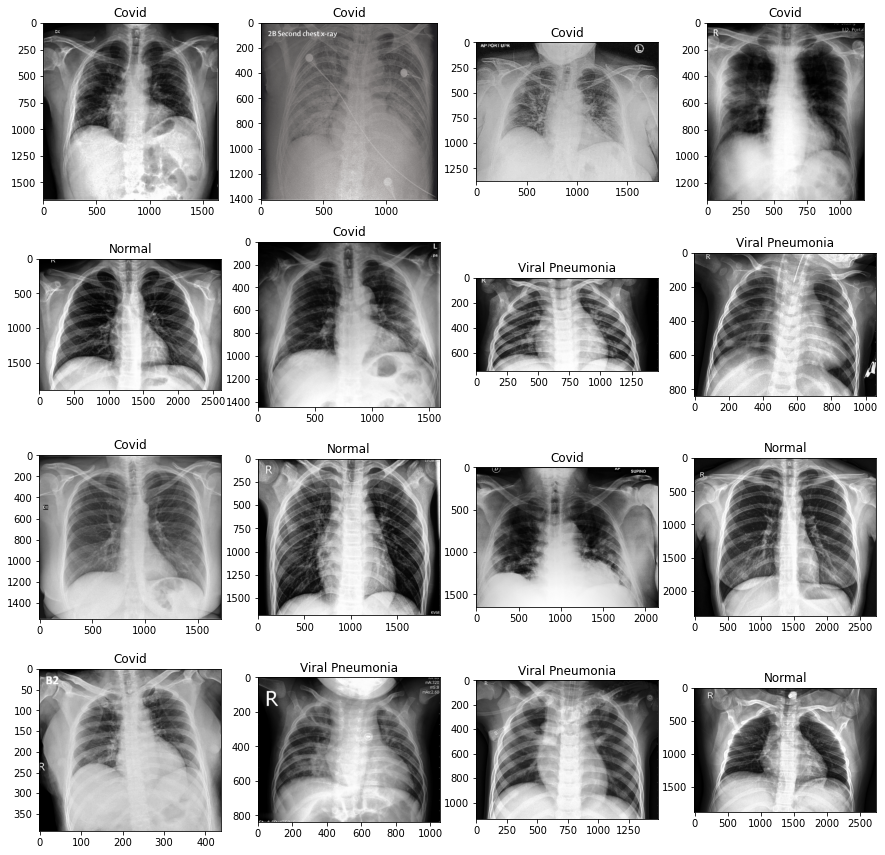

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
index = 250
rows = 4
cols = 4


plt.figure(figsize=(15,15))
for i in range(rows*cols):
  image_path = os.path.join(train_dir, train_df['label'][i], train_df['filename'][i])
  plt.subplot(rows, cols, i+1)
  plt.title(train_df['label'][i])
  plt.imshow(cv2.imread(image_path))


In [17]:
for filename in train_df:
  image_path = os.path.join(train_dir, train_df['label'][i], filename)


# Loading Images

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [61]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=5,
    zoom_range=0.2,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=64,
    shuffle=True,
    class_mode='categorical',
    seed=5,
    target_size=(250, 250)
)


test_datagen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=64,
    shuffle=True,
    class_mode='categorical',
    seed=5,
    target_size=(250, 250)
)


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [62]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [68]:
x, y = train_generator.__getitem__(0)

[0. 0. 1.]


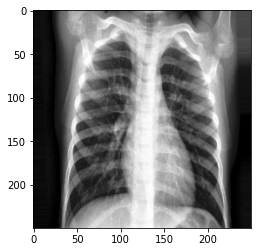

In [34]:
print(y[0])
plt.imshow(x[1])

In [64]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

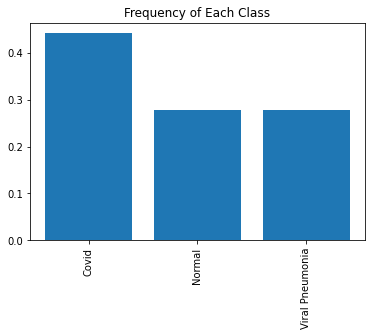

In [36]:
values, counts = np.unique(train_generator.labels, return_counts=True)

plt.xticks(rotation=90)
plt.bar(x=labels, height=counts/len(train_generator.labels))
plt.title("Frequency of Each Class")
plt.show()

In [56]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from keras.models import Model
from keras import backend as K
import tensorflow as tf

In [70]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(250,250,3))
base_model.trainable = False
x = base_model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
# and a logistic layer
predictions = Dense(3, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['acc'])

In [66]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [71]:
history = model.fit(train_generator, 
                              validation_data=test_generator,
                              epochs = 40)

Epoch 1/40
4/4 [==============================] - 16s 4s/step - loss: 1.1131 - acc: 0.4502 - val_loss: 0.9602 - val_acc: 0.5606
Epoch 2/40
4/4 [==============================] - 14s 3s/step - loss: 0.9464 - acc: 0.5179 - val_loss: 0.8521 - val_acc: 0.6970
Epoch 3/40
4/4 [==============================] - 14s 4s/step - loss: 0.8561 - acc: 0.6614 - val_loss: 0.7602 - val_acc: 0.7576
Epoch 4/40
4/4 [==============================] - 14s 3s/step - loss: 0.8130 - acc: 0.6016 - val_loss: 0.7083 - val_acc: 0.6667
Epoch 5/40
4/4 [==============================] - 14s 4s/step - loss: 0.7117 - acc: 0.7211 - val_loss: 0.6442 - val_acc: 0.8182
Epoch 6/40
4/4 [==============================] - 14s 4s/step - loss: 0.6578 - acc: 0.7849 - val_loss: 0.6136 - val_acc: 0.7576
Epoch 7/40
4/4 [==============================] - 14s 3s/step - loss: 0.6328 - acc: 0.7570 - val_loss: 0.5679 - val_acc: 0.7879
Epoch 8/40
4/4 [==============================] - 14s 3s/step - loss: 0.6039 - acc: 0.8008 - val_loss: 0

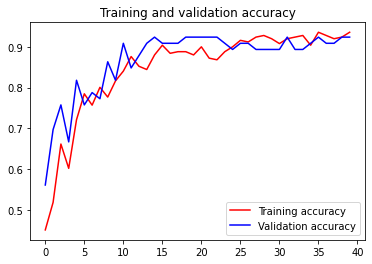

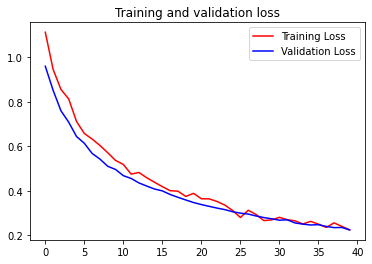

In [73]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [74]:
predicted_vals = model.predict_generator(test_generator, steps = len(test_generator))

<ipython-input-74-4bf3896b317d>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_vals = model.predict_generator(test_generator, steps = len(test_generator))


In [78]:
model.save('Covid.h5')